# Telecom Churn Analysis

# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,7)

## Reading Dataset

In [2]:
df=pd.read_csv("Telecome Churn.csv")

In [3]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Description of Columns

• State: US state in which the customer resides

• Account length: The number of days that this account has been active

• Area code: The three-digit area code of the corresponding customer’s phone number

• International plan: Customer has an international calling plan: YES / NO

• Voice mail plan: Customer has a voice mail feature: YES / NO

• Number vmail messages: average number of voice mail messages per month

• Total day minutes: total number of calling minutes used during the day

• Total day calls: total number of calls placed during the day

• Total day charge: billed cost of daytime calls

• Total eve minutes: total number of calling minutes used during the evening 

• Total eve calls: total number of calls placed during the evening

• Total eve charge:  billed cost of evening time calls

• Total night minutes: total number of calling minutes used during the night

• Total night calls: the total number of calls placed during the night

• Total night charge: the billed cost of nighttime calls

• Total intl minutes: total number of international minutes

• Total intl calls: total number of international calls

• Total intl charge: billed cost for international calls

• Customer service calls: number of calls placed to Customer Service

• Churn: whether the customer left the service: True/False

## Getting Information About Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## Basic Statistics of Data

In [5]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

## Checking for Unique Values for States , Area Code , International plan , Voice mail plan

In [6]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [7]:
df['Area code'].unique()

array([415, 408, 510], dtype=int64)

In [8]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

## Cleaning

### Checking for Null Values

In [10]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### There is No Null Values in Dataset 
#### So, We can go for EDA

## For Target Replacing True and False with 0 & 1 Accordingly

In [11]:
df['Churn']=df['Churn'].replace({False:0,True:1})

In [12]:
df['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [13]:
df['Churn'].mean()

0.145536384096024

### Probability of Custumer Left The Services is 14%

#### Plotting Historams for All the Columns

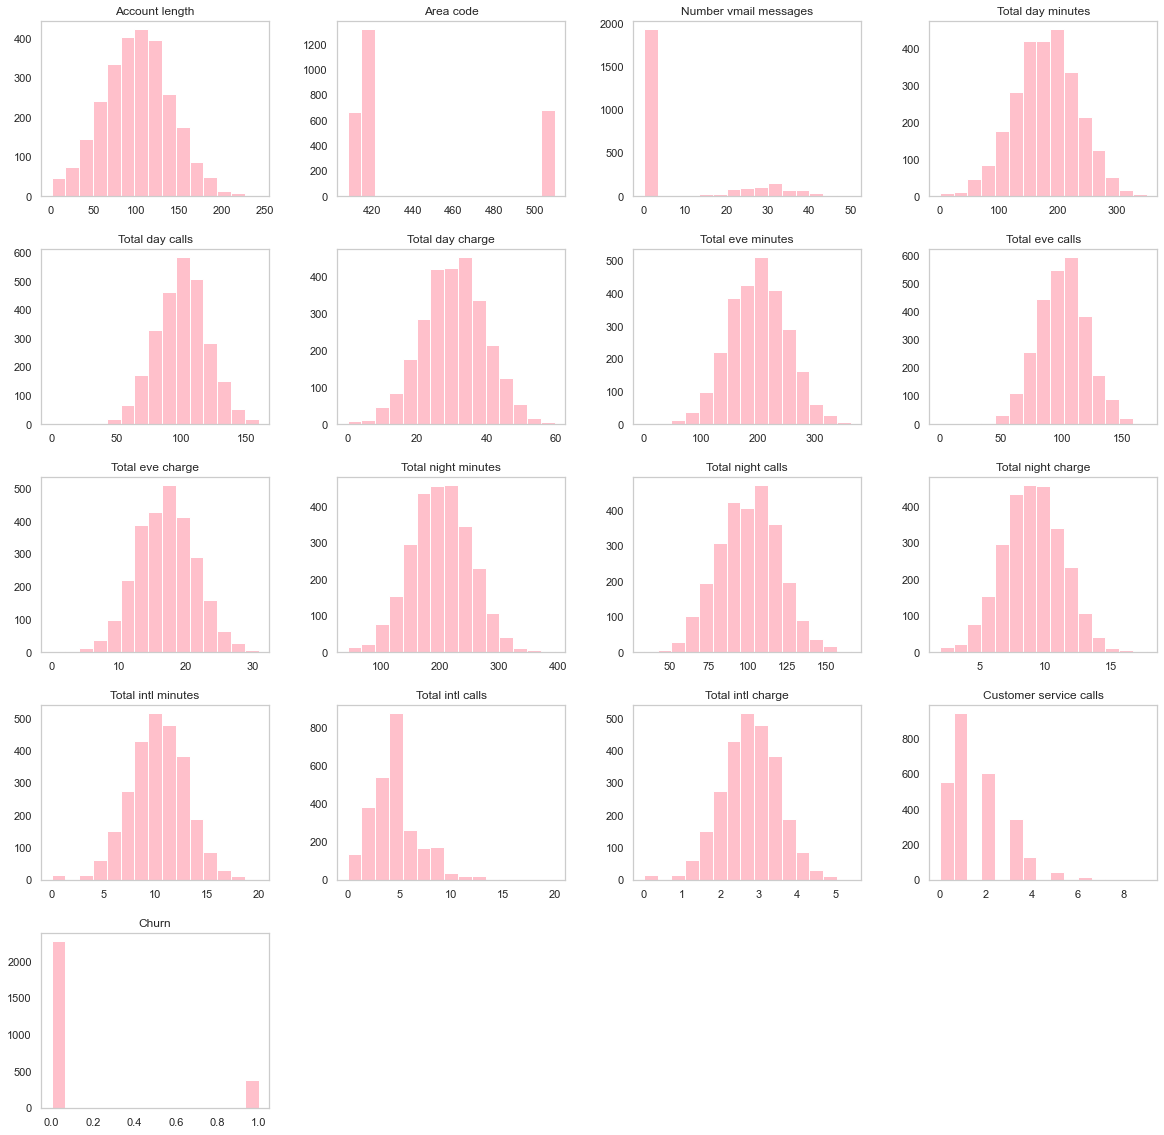

In [14]:
df.hist(figsize=(20,20),grid=False,color='pink',bins=15);

### Here from Histogram we can say that in Columms of  Account length , Total day minutes , Total day calls , Total day charge , Total eve minutes ,Total eve calls, Total eve charg , Total night minutes , Total night calls , Total night charge , Total intl minutes  & Total intl charge <h2>Most  Data Lie Near Mean & Median</h2>

## Countplot of Churn 

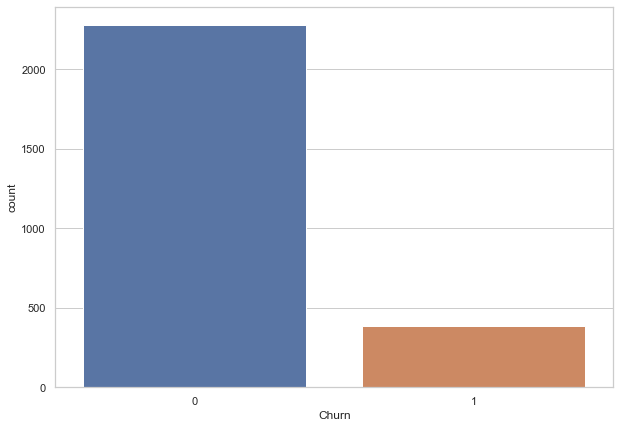

In [15]:
sns.countplot(data=df,x='Churn');

## Less than 500 Customers Left the Services 

## Top 10 States Who Left the Sevices 

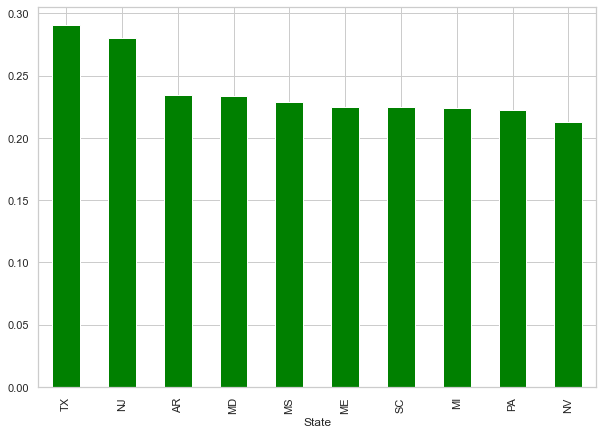

In [16]:
(df.groupby(['State'])['Churn'].mean()).nlargest(10).plot(kind='bar',color='green');

##  Graph Shows Probability of State who Left The Services

## Countplot for Customer Service Calls

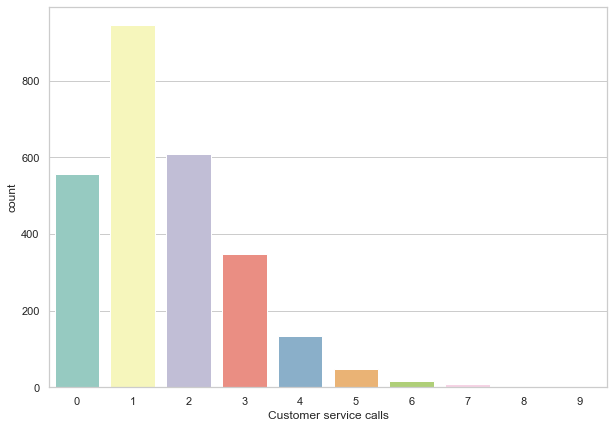

In [17]:
sns.countplot(data=df,x='Customer service calls',palette='Set3');

## Countplot for Customer Area Code

<AxesSubplot:xlabel='Area code', ylabel='count'>

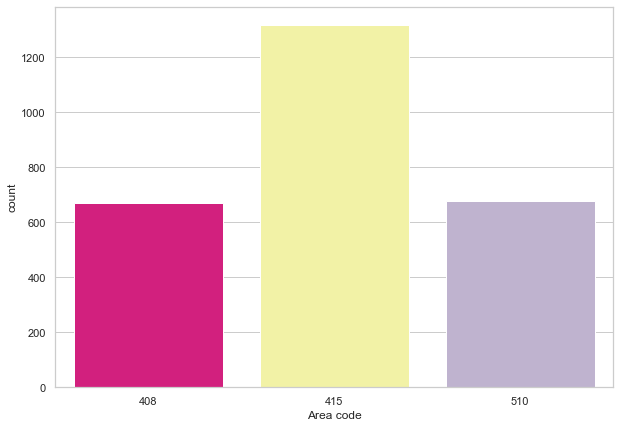

In [18]:
sns.countplot(data=df,x='Area code',palette='Accent_r')

## Counts of Customes Having International Plans & Voice Mail Plan

In [19]:
print(f'counts for International Plan \n {df["International plan"].value_counts()}\n\n')
print(f'counts for Voice Mail plan \n {df["Voice mail plan"].value_counts()}')

counts for International Plan 
 No     2396
Yes     270
Name: International plan, dtype: int64


counts for Voice Mail plan 
 No     1933
Yes     733
Name: Voice mail plan, dtype: int64


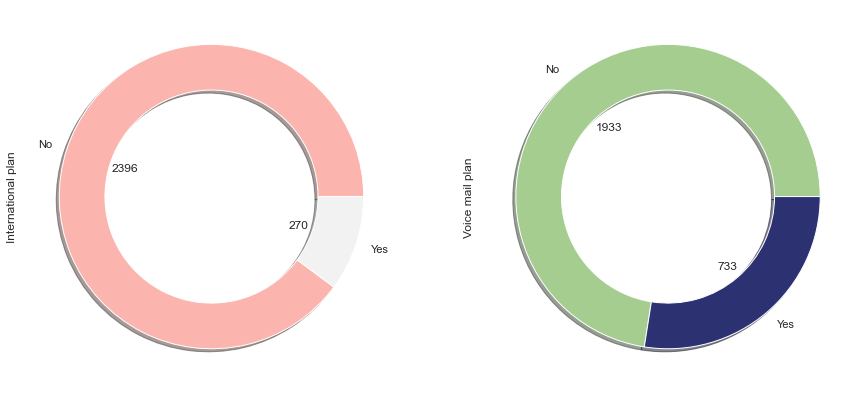

In [20]:
f,axes=plt.subplots(1,2,figsize=(15,8))
df["International plan"].value_counts().plot(kind='pie',autopct=lambda
                    p : '{:.0f}'.format(p * (df['International plan'].count()) / 100),wedgeprops=dict(width=.30),
                                             cmap='Pastel1',shadow=True,ax=axes[0])

df['Voice mail plan'].value_counts().plot(kind='pie',autopct=lambda
                                          p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100),shadow=True,
                                          wedgeprops=dict(width=.30),cmap='crest',ax=axes[1]);

## Count of Customer Who Purchased International Plajn / Voice mail Plan with Respect to Churn

In [21]:
print(f'counts for International Plan \n{df.groupby("International plan")["Churn"].value_counts()}\n\n')
print(f'counts for Voice Mail plan \n {df.groupby("Voice mail plan")["Churn"].value_counts()}\n')

counts for International Plan 
International plan  Churn
No                  0        2126
                    1         270
Yes                 0         152
                    1         118
Name: Churn, dtype: int64


counts for Voice Mail plan 
 Voice mail plan  Churn
No               0        1610
                 1         323
Yes              0         668
                 1          65
Name: Churn, dtype: int64



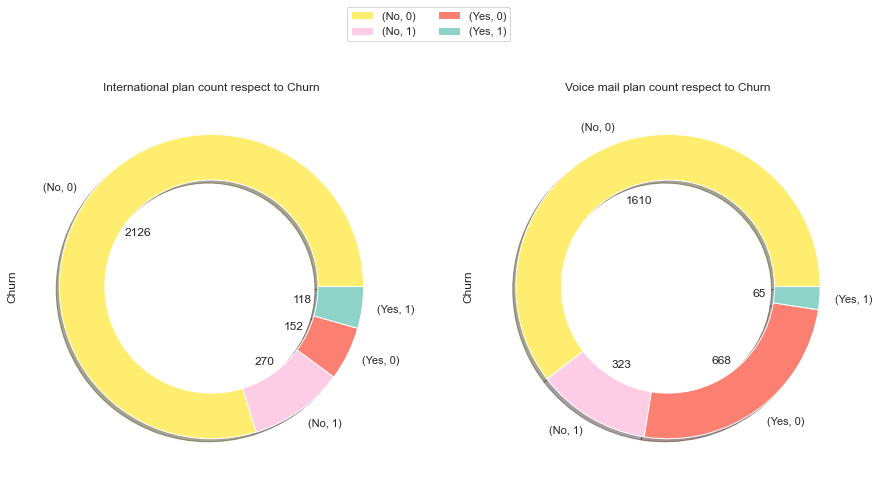

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('International plan count respect to Churn')
df.groupby('International plan')['Churn'].value_counts().plot(kind='pie', autopct=lambda
                                     p : '{:.0f}'.format(p * (df['International plan'].count()) / 100), cmap='Set3_r',
                                       wedgeprops=dict(width=.3), shadow=True)

plt.legend(bbox_to_anchor=(1.3,1.25), ncol=2)

plt.subplot(1,2,2)
plt.title('Voice mail plan count respect to Churn')
df.groupby('Voice mail plan')['Churn'].value_counts().plot(kind='pie' ,autopct=lambda
                                        p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100), cmap='Set3_r',
                                              wedgeprops=dict(width=.3), shadow=True);

## 1.Probability of Leaving Services Who have International Plan or Not
## 2.Probability of Leaving Services Who have Voice Mail Plan or Not

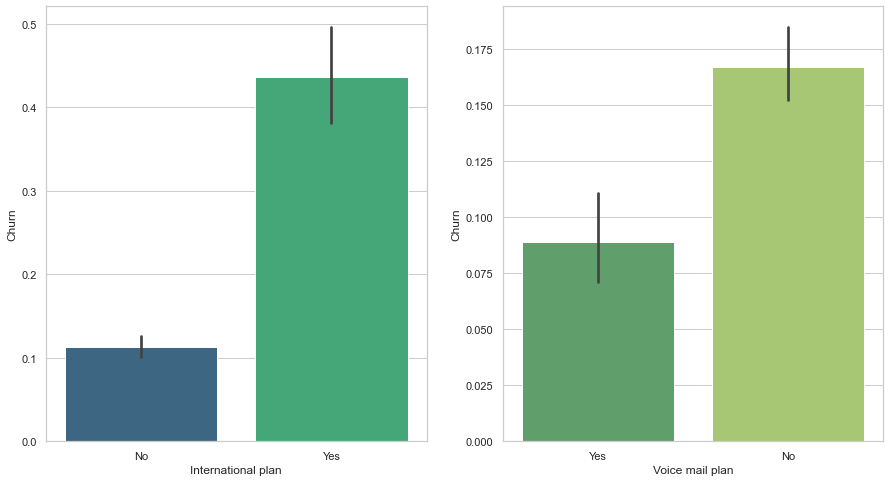

In [23]:
f,axes=plt.subplots(1,2,figsize=(15,8))

sns.barplot(data=df,x='International plan',y='Churn',estimator=np.mean,palette='viridis',ax=axes[0])

sns.barplot(data=df,x='Voice mail plan',y='Churn',estimator=np.mean,palette='summer',ax=axes[1]);


## Scatterplot of Total day minutes & Total night minutes with respect to Churn

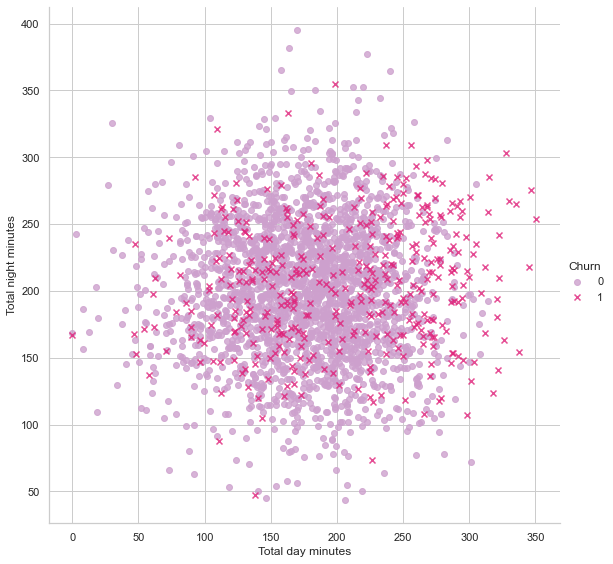

In [24]:
sns.lmplot('Total day minutes', 'Total night minutes', data = df, hue='Churn', fit_reg=False,palette='PuRd',markers=['o','x'],size=8);

## Scatterplot of Total day Calls & Total night Calls with respect to Churn

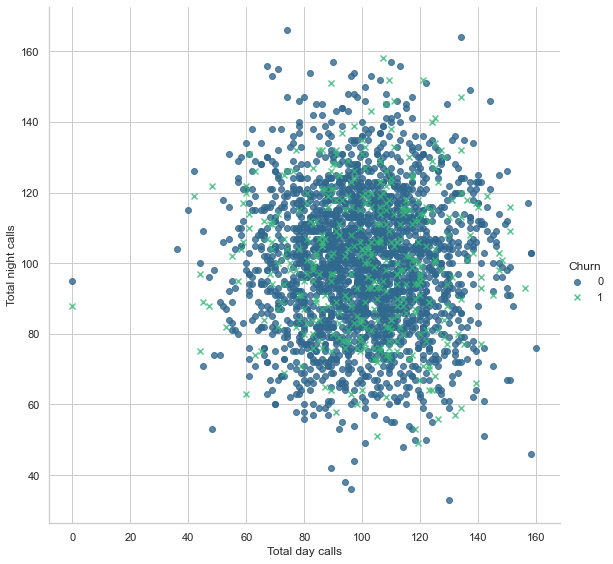

In [25]:
sns.lmplot('Total day calls', 'Total night calls', data = df, hue='Churn', fit_reg=False,palette='viridis',markers=['o','x'],size=8);

### Pairplot of Data

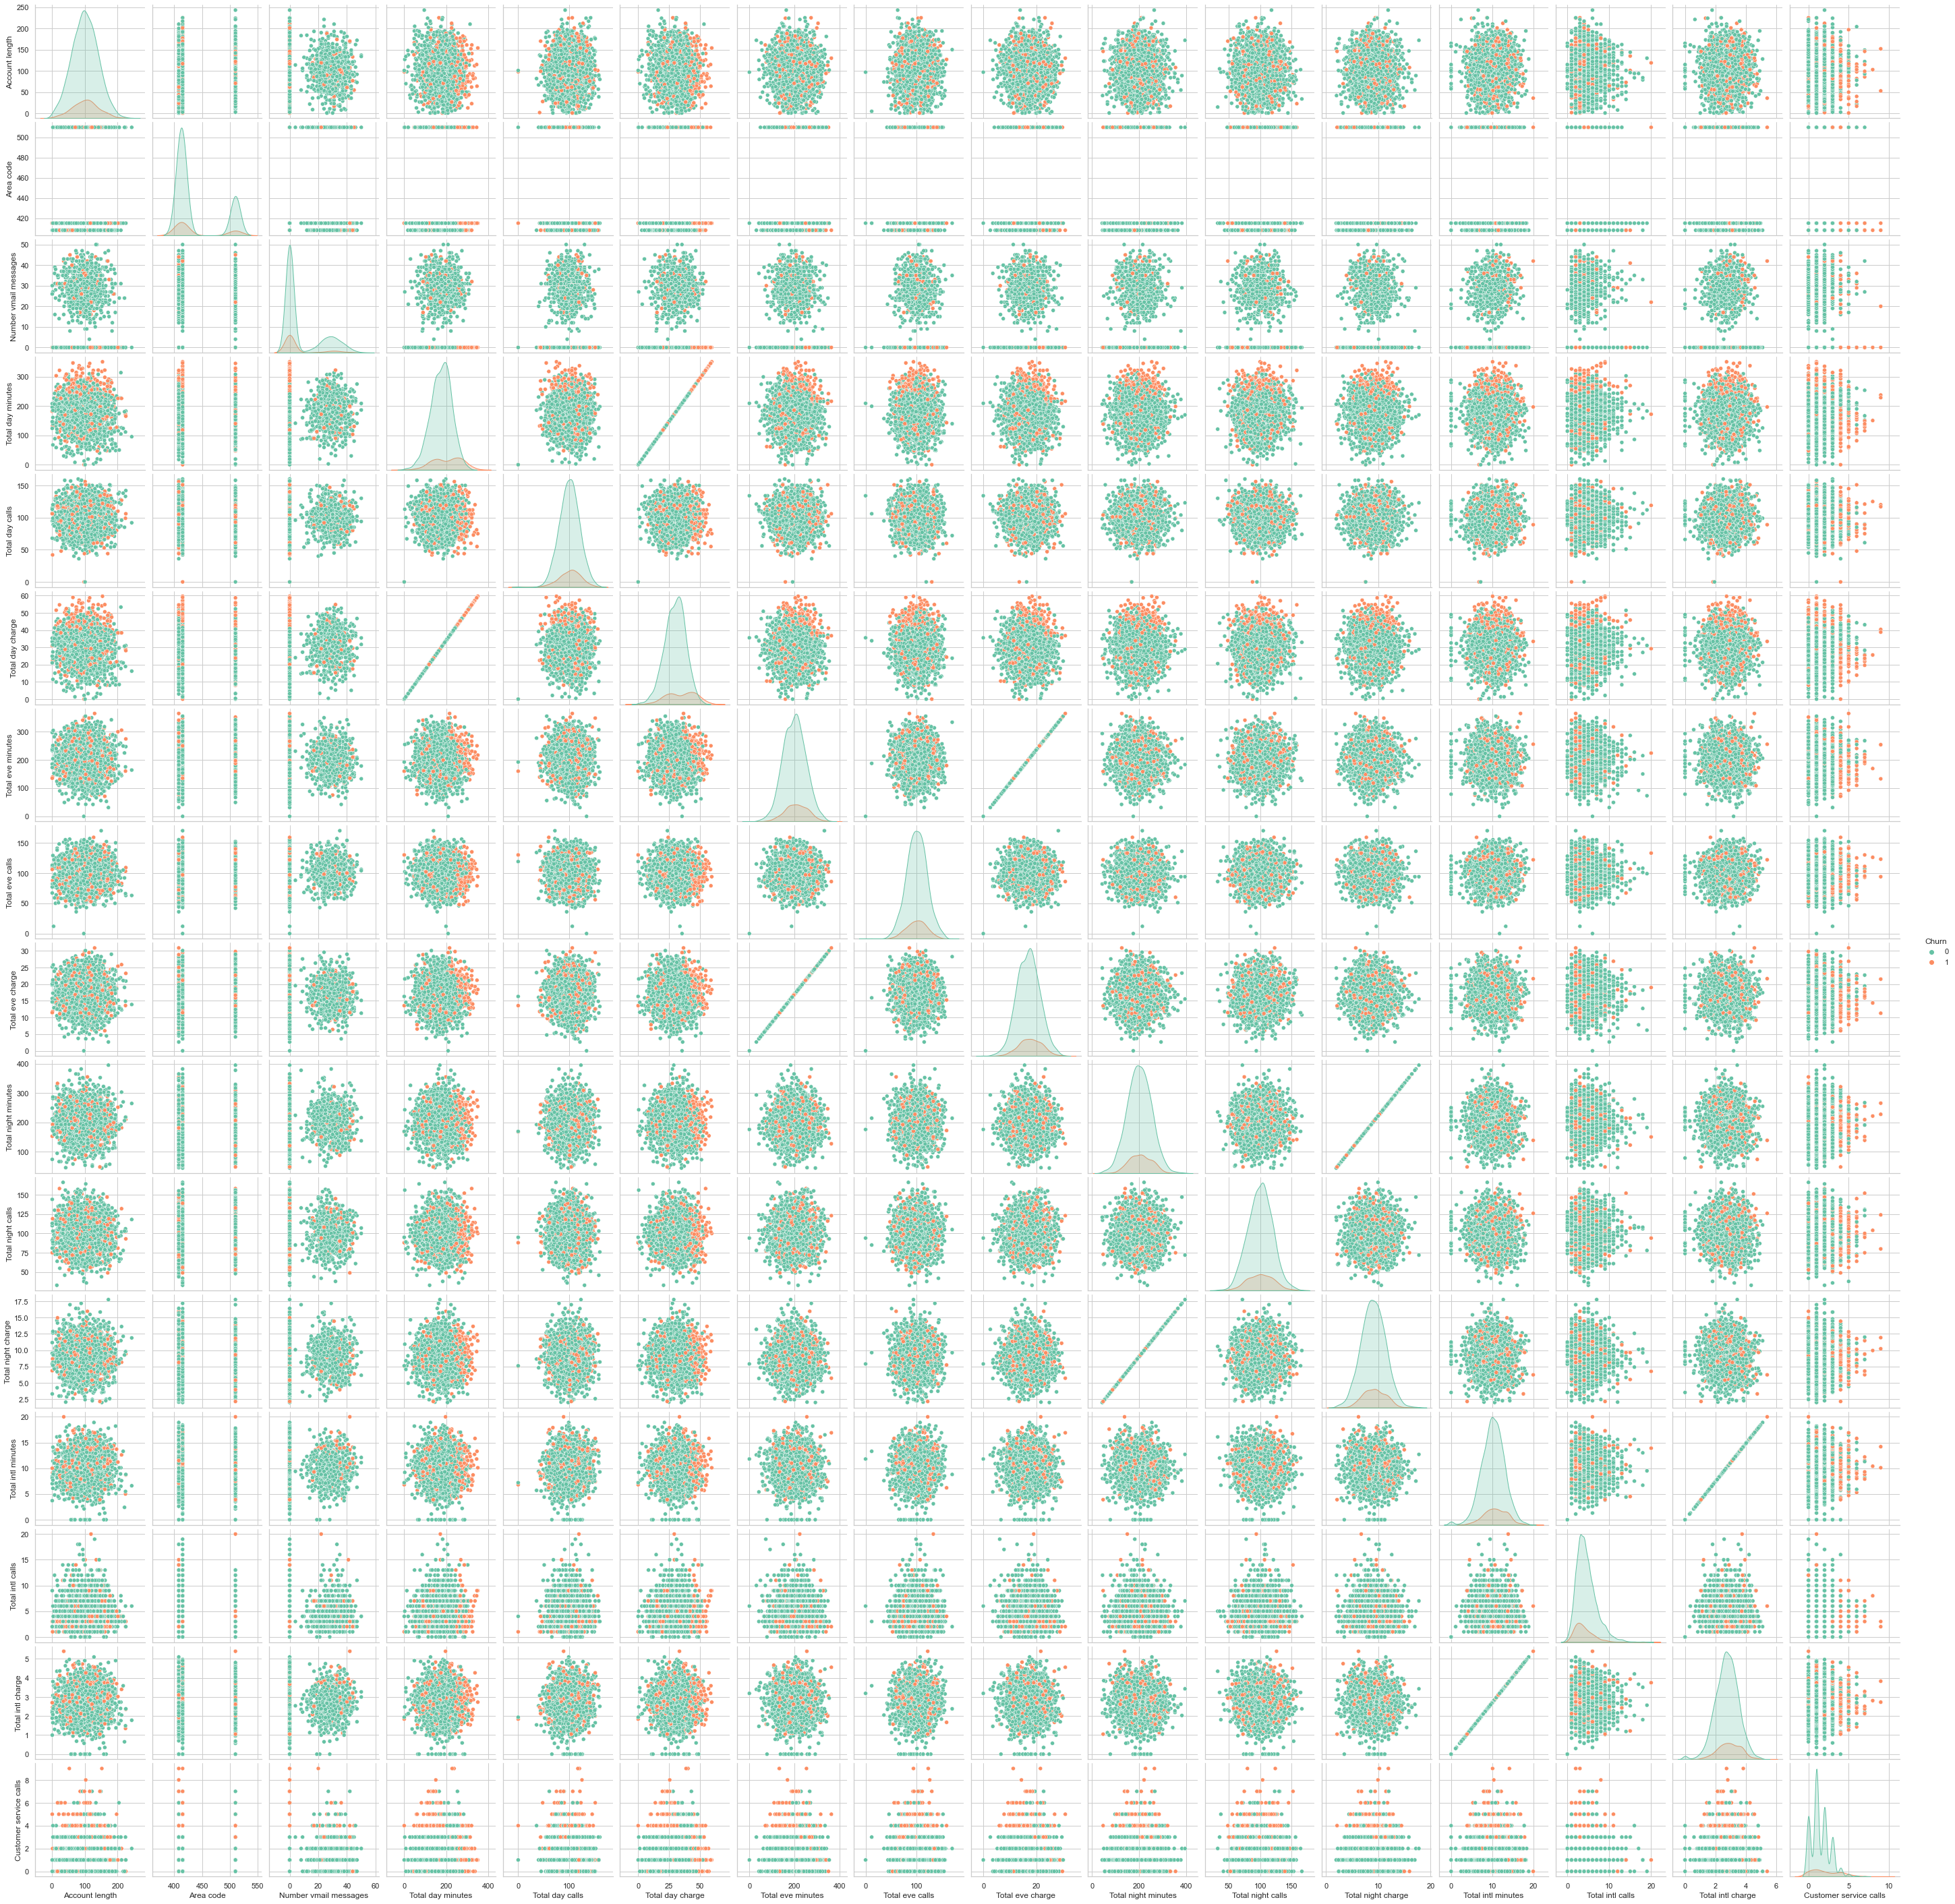

In [26]:
sns.pairplot(df,palette='Set2',hue='Churn')

## Getting Correlation By Heatmap

<AxesSubplot:>

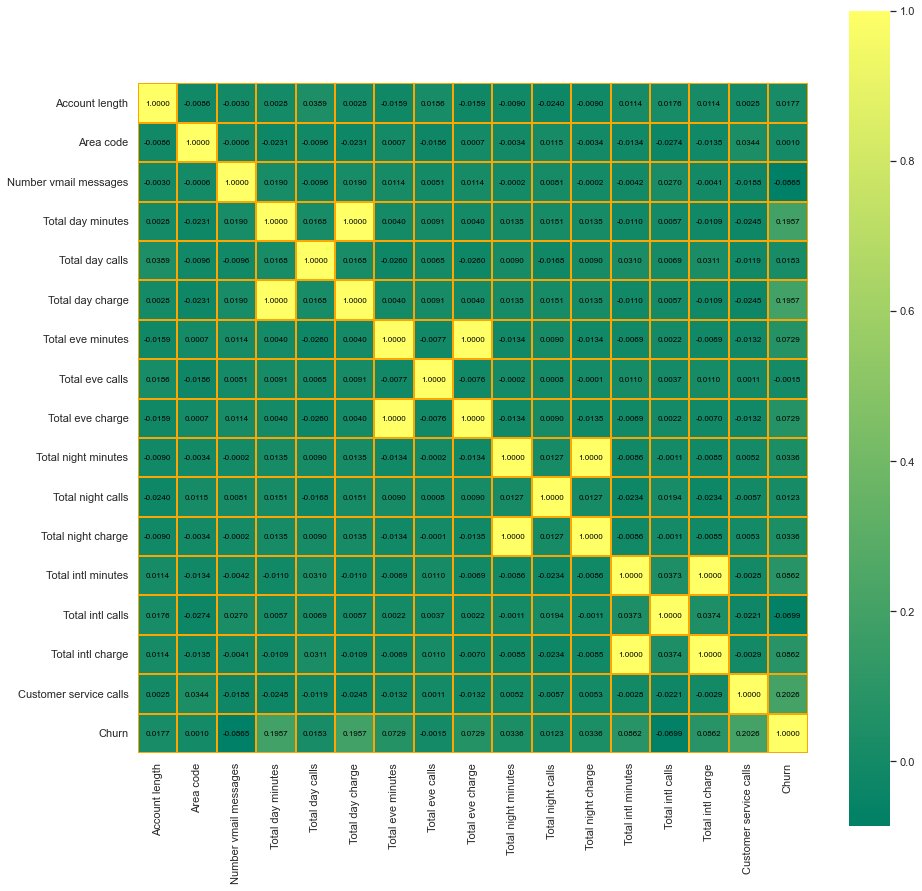

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

## Boxplot of Total International Minutes

<AxesSubplot:xlabel='Churn', ylabel='Total intl minutes'>

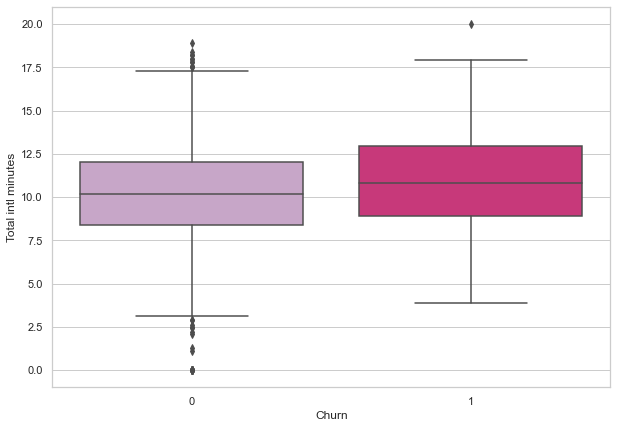

In [28]:
sns.boxplot(data=df,x='Churn',y='Total intl minutes',palette='PuRd')

## Boxplot of Total Evening Minutes

<AxesSubplot:xlabel='Area code', ylabel='Total eve charge'>

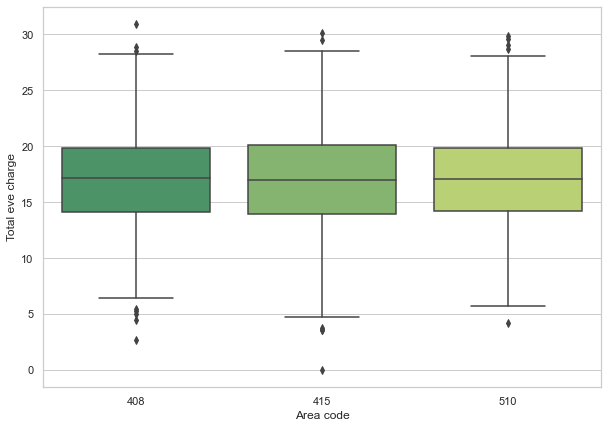

In [29]:
sns.boxplot(data=df,x='Area code',y='Total eve charge',palette='summer')

## Average Total Day Charges with Respect To Churn

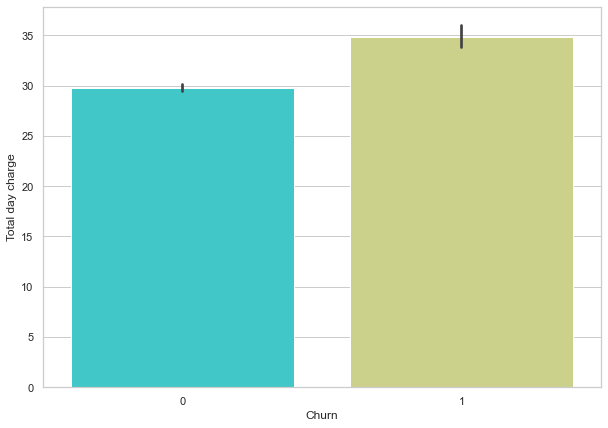

In [30]:
# df.groupby(['Churn'])['Total day charge'].mean().plot(kind='bar')
sns.barplot(data=df,y='Total day charge',x='Churn',palette='rainbow');

## The Charges are Higher for Customers who Left Services

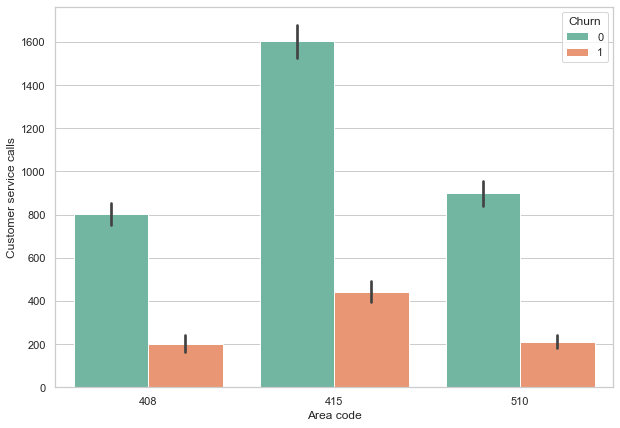

In [31]:
    sns.barplot(data=df,x='Area code',y='Customer service calls',estimator=sum,hue='Churn',palette='Set2');

### There is no such Difference in Usage of  Minutes in night 

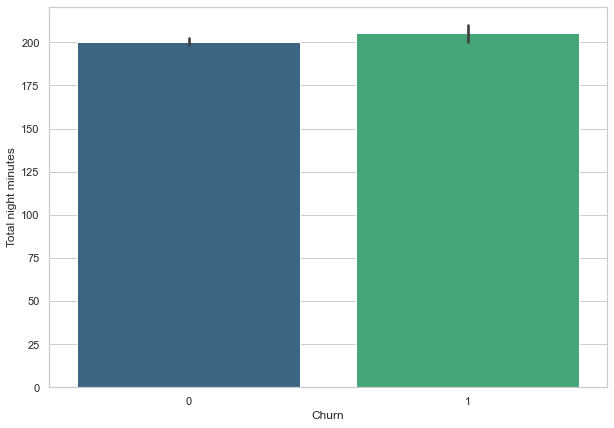

In [32]:
sns.barplot(data=df,y='Total night minutes',x='Churn',palette='viridis');

## We can go for Machine learning Model

In [33]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## Here some columns are Categorical  So, Label encoding is Required

In [34]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [35]:
df=pd.get_dummies(df) #OneHotEncoder

In [36]:
df.head()

Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   Total eve charge  Total night minutes  Total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  State_AK  State_AL  \
0               2.70                       1      0         0         0   
1               3.70                       1      0         0         0   
2               3.29                       0      0         0         0   
3               1.78                       2      0         0         0   
4               2.73                       3      0         0         0   

   State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  State_DE  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_FL  State_GA  State_HI  State_IA  State_ID  State_IL  State_IN  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  State_MI  \
0         1         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  State_NE  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  State_OK  \
0         0  

## Scaling Data

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
roscaler=RobustScaler()

In [39]:
df[['Account length','Area code','Number vmail messages','Total day minutes','Total day calls'
    ,'Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes'
    ,'Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge'
    ,'Customer service calls']]=roscaler.fit_transform(df[['Account length','Area code','Number vmail messages','Total day minutes','Total day calls'
                            ,'Total day charge','Total eve minutes','Total eve calls','Total eve charge'
                            ,'Total night minutes','Total night calls','Total night charge','Total intl minutes'
                            ,'Total intl calls','Total intl charge','Customer service calls']])

## Defining Objects For Features And Target

In [40]:
features=df.drop(['Churn'],axis=1)

In [41]:
target=df['Churn']

## Splitting Data for Training And Testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)

### Trying All Models on Data For Getting Best Accuracy

In [44]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score

In [45]:
models={'LogisticRegression':LogisticRegression(),
        'SGDC':SGDClassifier(),
        'DecisionTree':DecisionTreeClassifier(),
        'RandomForest':RandomForestClassifier(),
        'GradientBoost':GradientBoostingClassifier(),
        'KNN':KNeighborsClassifier(),
        'SVM':SVC(),
        'AdaBoost':AdaBoostClassifier(),
        'Naive Bayes':GaussianNB(),
        'LinearDiscriminant':LinearDiscriminantAnalysis(),
        'QuadraticDiscriminant':QuadraticDiscriminantAnalysis(),
        'XGBoost':XGBClassifier()
       }

In [46]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    con_mat=pd.DataFrame(confusion_matrix(target_test,y_pred),index=['Actual Negetive','Actual Positive'],columns=['Predicted Negetive','Predicted Positive'])
    print(f"{name} confuion matrix:--------> \n\n\n {con_mat}\n\n\n") 
    print(f'{name} accuracy score:----> {model1.score(features_test,target_test)}\n')
    print(f'{name} precision score:----> {precision_score(target_test,y_pred)}\n')
    print(f'{name} recall score:----> {recall_score(target_test,y_pred)}\n')
    print(f'{name} classification report:-------> \n\n {classification_report(target_test,y_pred)}\n\n\n')

LogisticRegression confuion matrix:--------> 


                  Predicted Negetive  Predicted Positive
Actual Negetive                 440                  19
Actual Positive                  58                  17



LogisticRegression accuracy score:----> 0.8558052434456929

LogisticRegression precision score:----> 0.4722222222222222

LogisticRegression recall score:----> 0.22666666666666666

LogisticRegression classification report:-------> 

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       459
           1       0.47      0.23      0.31        75

    accuracy                           0.86       534
   macro avg       0.68      0.59      0.61       534
weighted avg       0.83      0.86      0.83       534




SGDC confuion matrix:--------> 


                  Predicted Negetive  Predicted Positive
Actual Negetive                 446                  13
Actual Positive                  61                  14



SGDC accura

XGBoost confuion matrix:--------> 


                  Predicted Negetive  Predicted Positive
Actual Negetive                 457                   2
Actual Positive                  20                  55



XGBoost accuracy score:----> 0.9588014981273408

XGBoost precision score:----> 0.9649122807017544

XGBoost recall score:----> 0.7333333333333333

XGBoost classification report:-------> 

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.96      0.73      0.83        75

    accuracy                           0.96       534
   macro avg       0.96      0.86      0.90       534
weighted avg       0.96      0.96      0.96       534






## Best Accuracuy In Classification Algorithms is 96% in XgBoost and f1 Score is 0.83

In [47]:
XGBoost=XGBClassifier()

In [48]:
XGBoost.fit(features_train,target_train)

[17:51:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
XGBoost.score(features_test,target_test)

0.9588014981273408

## Dumping Model

In [50]:
import pickle
Telecom_churn_model=open('Telecom_churn.sav','wb')
pickle.dump(XGBoost,Telecom_churn_model)